When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.



# Importing needed packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
%matplotlib inline


# Reading datatsets

In [4]:
df=pd.read_csv('FuelConsumptionCo2.csv')

In [5]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [16]:
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


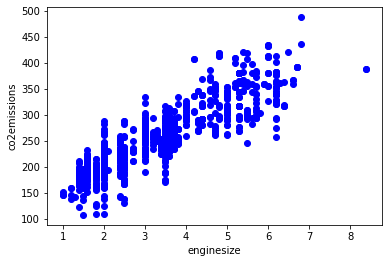

In [19]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('enginesize')
plt.ylabel('co2emissions')
plt.show()

Creating train and test datasets

In [23]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

# Modelling

In [32]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#the coefficients
print('coefficient',regr.coef_)
print('intercept',regr.intercept_)

coefficient [[ 9.60589865  7.71823099 10.18861092]]
intercept [62.18543512]


# Predictions

Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.

OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)



In [31]:
y_hat=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares:%.2f"%np.mean((y_hat-y)**2))
print("Variance score:%.2f"%regr.score(x,y))

Residual sum of squares:606.84
Variance score:0.85
